# CRICKET FIELDING ANALYSIS


**Author:** Krishna Potdar  
**Date:** June 2025  
**Tool:** Jupyter Notebook + Pandas + Matplotlib + Seaborn  
**Leve1:** ShadowFox Advanced level 







Starting Cricket Fielding Analysis...
Generating events for MS Dhoni...
Generating events for Virat Kohli...
Generating events for Ravindra Jadeja...
Total events generated: 120

CRICKET FIELDING ANALYSIS REPORT
Total Fielding Events: 120
Match: 1 at Wankhede Stadium, Mumbai
Team: India


MS DHONI
----------------------------------------
Performance Score: 109
Total Events: 40
Runs Saved: 21
Success Rate: 72.5%
Average Score per Event: 2.73
Action Breakdown:
  Clean Pick: 15 (37.5%)
  Catch: 3 (7.5%)
  Fumble: 3 (7.5%)
  Good Throw: 7 (17.5%)
  Bad Throw: 4 (10.0%)
  Dropped Catch: 1 (2.5%)
  Direct Hit: 2 (5.0%)
  Stumping: 2 (5.0%)
  Missed Run Out: 2 (5.0%)
  Missed Stumping: 1 (2.5%)

VIRAT KOHLI
----------------------------------------
Performance Score: 108
Total Events: 40
Runs Saved: 8
Success Rate: 65.0%
Average Score per Event: 2.70
Action Breakdown:
  Direct Hit: 4 (10.0%)
  Good Throw: 10 (25.0%)
  Run Out: 2 (5.0%)
  Catch: 6 (15.0%)
  Missed Run Out: 6 (15.0%)
  Dropped C

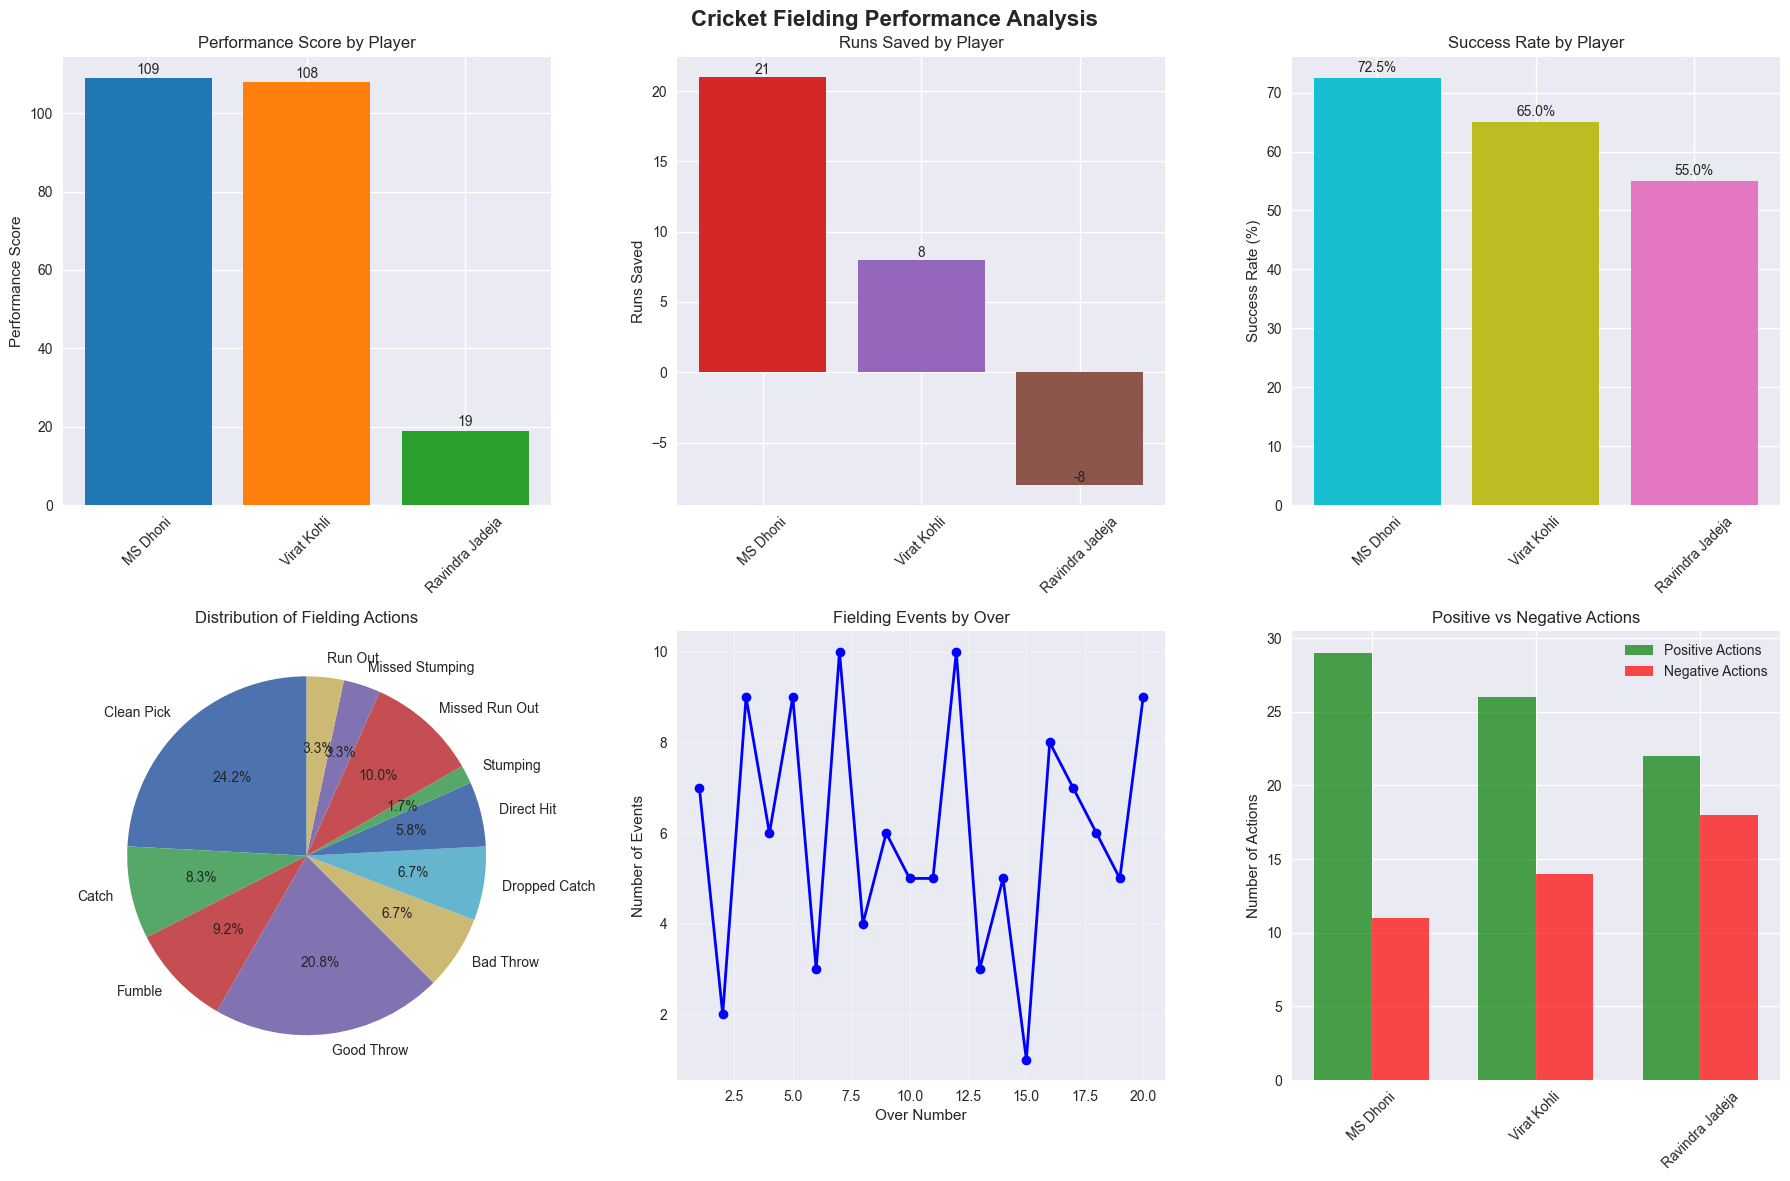


Data exported to cricket_fielding_analysis.csv

Analysis completed successfully!
Files generated:
- cricket_fielding_analysis.csv
- cricket_fielding_analysis.png


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

class CricketFieldingAnalyzer:
    def __init__(self):
        self.data = []
        self.performance_weights = {
            'clean_pick': 2,
            'good_throw': 3,
            'catch': 10,
            'dropped_catch': -5,
            'stumping': 12,
            'run_out': 10,
            'missed_run_out': -3,
            'direct_hit': 8,
            'fumble': -2,
            'bad_throw': -3,
            'missed_stumping': -4
        }
    
    def add_fielding_event(self, match_no, innings, team, player_name, ball_count, 
                          position, description, pick_type, throw_type, runs_saved, 
                          over_count, venue):
        """Add a fielding event to the dataset"""
        event = {
            'Match_No': match_no,
            'Innings': innings,
            'Team': team,
            'Player_Name': player_name,
            'Ball_Count': ball_count,
            'Position': position,
            'Short_Description': description,
            'Pick': pick_type,
            'Throw': throw_type,
            'Runs_Saved': runs_saved,
            'Over_Count': over_count,
            'Venue': venue,
            'Timestamp': datetime.now()
        }
        self.data.append(event)
    
    def create_sample_data(self):
        """Create sample data with EQUAL events for each player"""
        players = ['MS Dhoni', 'Virat Kohli', 'Ravindra Jadeja']
        positions = ['Wicket-keeper', 'Slip', 'Point', 'Cover', 'Mid-wicket', 'Long-on', 'Deep square leg']
        
        # Set random seed for consistent results
        np.random.seed(42)
        
        # Generate exactly 40 events for each player
        for player in players:
            print(f"Generating events for {player}...")
            
            for event_number in range(40):  # Exactly 40 events per player
                # Generate random over and ball numbers
                over_no = np.random.randint(1, 21)  # Random over between 1-20
                ball_in_over = np.random.randint(1, 7)  # Random ball 1-6
                position = np.random.choice(positions)
                
                # Choose fielding action with realistic probabilities
                action_types = [
                    'clean_pick', 'good_throw', 'catch', 'dropped_catch', 
                    'stumping', 'run_out', 'missed_run_out', 'direct_hit',
                    'fumble', 'bad_throw', 'missed_stumping'
                ]
                action_probs = [0.25, 0.20, 0.08, 0.03, 0.02, 0.05, 0.07, 0.05, 0.10, 0.10, 0.05]
                
                action_type = np.random.choice(action_types, p=action_probs)
                
                # Calculate runs saved based on action type
                if action_type in ['catch', 'stumping', 'run_out']:
                    runs_saved = np.random.randint(1, 6)
                elif action_type in ['clean_pick', 'good_throw', 'direct_hit']:
                    runs_saved = np.random.randint(0, 3)
                elif action_type in ['dropped_catch', 'missed_run_out', 'fumble', 'bad_throw', 'missed_stumping']:
                    runs_saved = -np.random.randint(1, 4)
                else:
                    runs_saved = 0
                
                # Create simple descriptions
                descriptions = {
                    'clean_pick': f"Clean pick up by {player} at {position}",
                    'good_throw': f"Good throw from {player}",
                    'catch': f"Catch taken by {player}",
                    'dropped_catch': f"Catch dropped by {player}",
                    'stumping': f"Stumping by {player}",
                    'run_out': f"Run out by {player}",
                    'missed_run_out': f"Run out missed by {player}",
                    'direct_hit': f"Direct hit by {player}",
                    'fumble': f"Ball fumbled by {player}",
                    'bad_throw': f"Bad throw by {player}",
                    'missed_stumping': f"Stumping missed by {player}"
                }
                
                # Add the event to data
                self.add_fielding_event(
                    match_no=1,
                    innings=1,
                    team="India",
                    player_name=player,
                    ball_count=ball_in_over,
                    position=position,
                    description=descriptions[action_type],
                    pick_type=action_type,
                    throw_type=action_type if action_type in ['run_out', 'missed_run_out', 'stumping', 'missed_stumping'] else 'none',
                    runs_saved=runs_saved,
                    over_count=over_no,
                    venue="Wankhede Stadium, Mumbai"
                )
        
        print(f"Total events generated: {len(self.data)}")
    
    def calculate_performance_score(self, player_name):
        """Calculate performance score for a specific player"""
        player_data = [event for event in self.data if event['Player_Name'] == player_name]
        
        if not player_data:
            return 0, {}, 0
        
        # Count different types of fielding actions
        action_counts = {}
        total_runs_saved = 0
        
        for event in player_data:
            action = event['Pick']
            action_counts[action] = action_counts.get(action, 0) + 1
            total_runs_saved += event['Runs_Saved']
        
        # Calculate performance score using weights
        performance_score = 0
        for action, count in action_counts.items():
            if action in self.performance_weights:
                performance_score += count * self.performance_weights[action]
        
        # Add runs saved to total score
        performance_score += total_runs_saved
        
        return performance_score, action_counts, total_runs_saved
    
    def generate_report(self):
        """Generate comprehensive fielding analysis report"""
        if not self.data:
            print("No data available. Creating sample data...")
            self.create_sample_data()
        
        df = pd.DataFrame(self.data)
        
        print("\n" + "="*60)
        print("CRICKET FIELDING ANALYSIS REPORT")
        print("="*60)
        print(f"Total Fielding Events: {len(df)}")
        print(f"Match: {df['Match_No'].iloc[0]} at {df['Venue'].iloc[0]}")
        print(f"Team: {df['Team'].iloc[0]}")
        print("\n" + "="*60)
        
        # Calculate stats for each player
        players = df['Player_Name'].unique()
        player_stats = {}
        
        for player in players:
            score, actions, runs_saved = self.calculate_performance_score(player)
            total_events = len([e for e in self.data if e['Player_Name'] == player])
            
            # Calculate some basic stats
            positive_actions = 0
            negative_actions = 0
            for action, count in actions.items():
                if self.performance_weights.get(action, 0) > 0:
                    positive_actions += count
                else:
                    negative_actions += count
            
            success_rate = (positive_actions / total_events * 100) if total_events > 0 else 0
            avg_score = score / total_events if total_events > 0 else 0
            
            player_stats[player] = {
                'Performance_Score': score,
                'Actions': actions,
                'Runs_Saved': runs_saved,
                'Total_Events': total_events,
                'Success_Rate': success_rate,
                'Average_Score': avg_score,
                'Positive_Actions': positive_actions,
                'Negative_Actions': negative_actions
            }
        
        # Display player statistics
        for player, stats in player_stats.items():
            print(f"\n{player.upper()}")
            print("-" * 40)
            print(f"Performance Score: {stats['Performance_Score']}")
            print(f"Total Events: {stats['Total_Events']}")
            print(f"Runs Saved: {stats['Runs_Saved']}")
            print(f"Success Rate: {stats['Success_Rate']:.1f}%")
            print(f"Average Score per Event: {stats['Average_Score']:.2f}")
            print("Action Breakdown:")
            for action, count in stats['Actions'].items():
                percentage = (count / stats['Total_Events']) * 100
                print(f"  {action.replace('_', ' ').title()}: {count} ({percentage:.1f}%)")
        
        # Team summary
        print(f"\nTEAM SUMMARY")
        print("-" * 40)
        total_score = sum(stats['Performance_Score'] for stats in player_stats.values())
        total_runs_saved = sum(stats['Runs_Saved'] for stats in player_stats.values())
        print(f"Total Team Performance Score: {total_score}")
        print(f"Total Runs Saved: {total_runs_saved}")
        
        # Find best performer
        best_player = max(player_stats.items(), key=lambda x: x[1]['Performance_Score'])
        print(f"Best Performer: {best_player[0]} (Score: {best_player[1]['Performance_Score']})")
        
        # Player rankings
        print(f"\nPLAYER RANKINGS:")
        print("-" * 40)
        sorted_players = sorted(player_stats.items(), key=lambda x: x[1]['Performance_Score'], reverse=True)
        for rank, (player, stats) in enumerate(sorted_players, 1):
            print(f"{rank}. {player}: {stats['Performance_Score']} points")
        
        return df, player_stats
    
    def visualize_analysis(self, df, player_stats):
        """Create visualizations for the fielding analysis"""
        # Try to use seaborn style, but fallback if not available
        try:
            plt.style.use('seaborn-v0_8')
        except:
            plt.style.use('default')
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Cricket Fielding Performance Analysis', fontsize=16, fontweight='bold')
        
        # Get player data
        players = list(player_stats.keys())
        
        # 1. Performance Score Comparison
        scores = [player_stats[player]['Performance_Score'] for player in players]
        axes[0, 0].bar(players, scores, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
        axes[0, 0].set_title('Performance Score by Player')
        axes[0, 0].set_ylabel('Performance Score')
        axes[0, 0].tick_params(axis='x', rotation=45)
        
        # Add values on top of bars
        for i, v in enumerate(scores):
            axes[0, 0].text(i, v + max(scores)*0.01, str(v), ha='center')
        
        # 2. Runs Saved Distribution
        runs_saved = [player_stats[player]['Runs_Saved'] for player in players]
        axes[0, 1].bar(players, runs_saved, color=['#d62728', '#9467bd', '#8c564b'])
        axes[0, 1].set_title('Runs Saved by Player')
        axes[0, 1].set_ylabel('Runs Saved')
        axes[0, 1].tick_params(axis='x', rotation=45)
        
        # Add values on bars
        for i, v in enumerate(runs_saved):
            axes[0, 1].text(i, v + max(runs_saved)*0.01, str(v), ha='center')
        
        # 3. Success Rate Comparison
        success_rates = [player_stats[player]['Success_Rate'] for player in players]
        axes[0, 2].bar(players, success_rates, color=['#17becf', '#bcbd22', '#e377c2'])
        axes[0, 2].set_title('Success Rate by Player')
        axes[0, 2].set_ylabel('Success Rate (%)')
        axes[0, 2].tick_params(axis='x', rotation=45)
        
        # Add percentage values
        for i, v in enumerate(success_rates):
            axes[0, 2].text(i, v + 1, f'{v:.1f}%', ha='center')
        
        # 4. Action Types Distribution (All Players Combined)
        all_actions = {}
        for stats in player_stats.values():
            for action, count in stats['Actions'].items():
                all_actions[action] = all_actions.get(action, 0) + count
        
        actions = list(all_actions.keys())
        counts = list(all_actions.values())
        axes[1, 0].pie(counts, labels=[a.replace('_', ' ').title() for a in actions], 
                       autopct='%1.1f%%', startangle=90)
        axes[1, 0].set_title('Distribution of Fielding Actions')
        
        # 5. Over-wise Events
        over_events = df.groupby('Over_Count').size()
        axes[1, 1].plot(over_events.index, over_events.values, marker='o', linewidth=2, color='blue')
        axes[1, 1].set_title('Fielding Events by Over')
        axes[1, 1].set_xlabel('Over Number')
        axes[1, 1].set_ylabel('Number of Events')
        axes[1, 1].grid(True, alpha=0.3)
        
        # 6. Positive vs Negative Actions
        pos_actions = [player_stats[player]['Positive_Actions'] for player in players]
        neg_actions = [player_stats[player]['Negative_Actions'] for player in players]
        
        x = range(len(players))
        width = 0.35
        
        axes[1, 2].bar([i - width/2 for i in x], pos_actions, width, label='Positive Actions', color='green', alpha=0.7)
        axes[1, 2].bar([i + width/2 for i in x], neg_actions, width, label='Negative Actions', color='red', alpha=0.7)
        
        axes[1, 2].set_title('Positive vs Negative Actions')
        axes[1, 2].set_ylabel('Number of Actions')
        axes[1, 2].set_xticks(x)
        axes[1, 2].set_xticklabels(players, rotation=45)
        axes[1, 2].legend()
        
        plt.tight_layout()
        plt.savefig('cricket_fielding_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def export_to_csv(self, filename="cricket_fielding_analysis.csv"):
        """Export the analysis data to CSV"""
        if not self.data:
            self.create_sample_data()
        
        df = pd.DataFrame(self.data)
        # Sort by player name and then by timestamp
        df = df.sort_values(['Player_Name', 'Timestamp'])
        df.to_csv(filename, index=False)
        print(f"\nData exported to {filename}")
        return df
    
    def run_complete_analysis(self):
        """Run the complete fielding analysis"""
        print("Starting Cricket Fielding Analysis...")
        
        # Generate sample data if no data exists
        if not self.data:
            self.create_sample_data()
        
        # Generate report
        df, player_stats = self.generate_report()
        
        # Create visualizations
        self.visualize_analysis(df, player_stats)
        
        # Export data
        self.export_to_csv()
        
        print("\nAnalysis completed successfully!")
        print("Files generated:")
        print("- cricket_fielding_analysis.csv")
        print("- cricket_fielding_analysis.png")
        
        return df, player_stats

# Usage Example
if __name__ == "__main__":
    # Create analyzer instance
    analyzer = CricketFieldingAnalyzer()
    
    # Run complete analysis
    df, stats = analyzer.run_complete_analysis()
    
    # Optional: Add custom events manually
    # analyzer.add_fielding_event(
    #     match_no=1, innings=1, team="India", player_name="MS Dhoni",
    #     ball_count=3, position="Wicket-keeper", 
    #     description="Quick stumping opportunity",
    #     pick_type="stumping", throw_type="stumping", 
    #     runs_saved=4, over_count=15, venue="Wankhede Stadium"
    # )